In [12]:
%load_ext autoreload
%autoreload 2 

from datasets import load_dataset
import os
import matplotlib.pyplot as plt
import sys
from PIL import Image
import cv2
import numpy as np

from src.image_preprocessor_utils import ImageUtils

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from common.common_methods import CommonMethods

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Resize images for Stable Diffusion and Resize back the Generated Images
- Load dataset to huggingface

Select resizing alg. lanczos, bicubic or letterbox and move the prompts (metadata) file to resized images folder

In [13]:
config_file_path = "./preprocessor_config.yaml"
config = CommonMethods.read_yaml(config_file_path)

input_images_dir = config["dataloader"]["images_to_be_resized_path"]
resized_images_dir = config["dataloader"]["resized_images_dir"]

Check how letterbox resizes the images

Original image size: (1280, 1024) resized image size:  (1024, 1024)


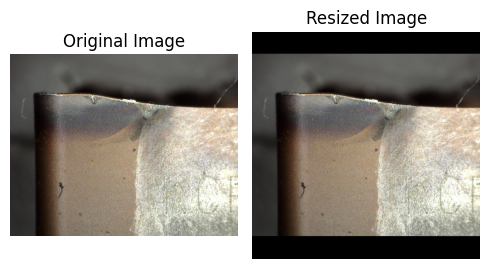

In [44]:
# original image size 
test_img_path = os.path.join(input_images_dir, "A003 - 20181210_135637.bmp")
img = Image.open(test_img_path)
og_shape = np.array(img).shape

#need to resize (1280,1024) to (1024,1024)
resized_im, ratio, (dw, dh) = ImageUtils.letterbox(test_img_path)
print("Original image size:", img.size, "resized image size: ", resized_im.shape[:2])
ImageUtils.show_og_and_resized_image(img, resized_im)

In [14]:
# ImageUtils.resize_all_images(input_images_dir, resized_images_dir, "letterbox", target_image_width=1024, target_image_height=1024)
ImageUtils.resize_all_images(input_images_dir, resized_images_dir, "lanczos", 1024, 1024)
ImageUtils.copy_metadata_file_to_resized_images_dir(input_images_dir, resized_images_dir) # metadata includes labels of the images

86 images are resized to 1024x1024 using lanczos and saved to ../Data/resized_fba_with_lanczos_wo_wearscores_refactoredlabels
Metadata file metadata.jsonl copied to ../Data/resized_fba_with_lanczos_wo_wearscores_refactoredlabels


Create HuggingFace dataset

In [15]:
dataset = load_dataset("imagefolder", data_dir=resized_images_dir, drop_labels="True")

huggingface_dataset_link = config["dataloader"]["huggingface_dataset_link"]
dataset.push_to_hub(huggingface_dataset_link)

Generating train split: 86 examples [00:00, 14582.40 examples/s]
Uploading the dataset shards: 100%|██████████| 1/1 [00:27<00:00, 27.47s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/artisanalwasp/resized_fba_with_lanczos_wo_wearscores_refactoredlabels/commit/b203907d297bf3d38faacc1094974e71816048ad', commit_message='Upload dataset', commit_description='', oid='b203907d297bf3d38faacc1094974e71816048ad', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/artisanalwasp/resized_fba_with_lanczos_wo_wearscores_refactoredlabels', endpoint='https://huggingface.co', repo_type='dataset', repo_id='artisanalwasp/resized_fba_with_lanczos_wo_wearscores_refactoredlabels'), pr_revision=None, pr_num=None)

In [16]:
hf_dataset = load_dataset(huggingface_dataset_link)
print(hf_dataset)

Generating train split: 100%|██████████| 86/86 [00:01<00:00, 79.33 examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 86
    })
})


--------------------------------------------------------------------------------------------------------------------------------------------------

Resize the generated images to the original image size

In [5]:
%load_ext autoreload
%autoreload 2 

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from common.common_methods import CommonMethods
from src.image_preprocessor_utils import ImageUtils

config_file_path = "./preprocessor_config.yaml"
config = CommonMethods.read_yaml(config_file_path)

generated_im_dir = config["dataloader"]["generated_images_dir"]
resized_gen_im_dir = "../Data/FBA_dataset/generated/second_try/bue/gen15/resized"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# ImageUtils.resize_all_images(generated_im_dir, resized_gen_im_dir, "letterbox", target_image_width=og_shape[0], target_image_height=og_shape[1])
ImageUtils.resize_all_images(generated_im_dir, resized_gen_im_dir, "lanczos", target_image_width=1280, target_image_height=1024)
ImageUtils.png_to_bmp_all_images(resized_gen_im_dir, "../Data/FBA_dataset/generated/second_try/bue/gen15/resized_bmp")

15 images are resized to 1280x1024 using lanczos and saved to ../Data/FBA_dataset/generated/second_try/bue/gen15/resized
Conversion completed. 15 files converted to .bmp format.
